# Game of Thrones Survival


Dans ce notebook, nous allons utiliser différents algorithme de machine learning pour déterminer si un personnage survit dans la série ou non.

Tout d'abord, nous importons les fichiers contenant les données depuis notre google drive.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/Machine Learning/GoT Survival")
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'Data cleaning.gsheet'	 Notebooks   Présentation.gslides   test.png
 Datasets		 Photos      Questions.gsheet	    tree.dot


# Data analysis


Dans cette partie, nous allons réaliser un test pour déterminer quels paramètres nous pouvons utiliser pour la classification.

D'abord, importons le fichier contenant les données des personnages de Game of Thrones.

In [0]:
survival = pd.read_csv("Datasets/character_data_S01-S08.csv")
survival.head()

,id,name,sex,religion,occupation,social_status,allegiance_last,allegiance_switched,intro_season,intro_episode,intro_time_sec,intro_time_hrs,dth_flag,dth_season,dth_episode,dth_time_sec,dth_time_hrs,censor_time_sec,censor_time_hrs,exp_season,exp_episode,exp_time_sec,exp_time_hrs,featured_episode_count,prominence,dth_description,icd10_dx_code,icd10_dx_text,icd10_cause_code,icd10_cause_text,icd10_place_code,icd10_place_text,top_location,geo_location,time_of_day,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,100,Waymar Royce,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,342.0,0.10,342,0.10,1,1,342,0.10,1,1.0000,Killed by a white walker in a forest,T14,Injury of unspecified body region,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,101,Gared Tuttle,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,405.0,0.11,405,0.11,1,1,405,0.11,1,1.0000,Decapitation by a white walker in a forest,S18,Traumatic amputation at neck level,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,102,Will,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,692.0,0.19,692,0.19,1,1,692,0.19,1,1.0000,Decapitation by Ned Stark (legal execution) in...,S18,Traumatic amputation at neck level,Y35.5,Legal execution,Y92.86,Other specified countryside,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,103,Irri,2,1,2,2,2,2,1,1,135,0.04,1,2.0,16.0,48623.0,13.51,48623,13.51,2,16,48489,13.47,13,1.6250,Strangled to death with a tassel by Doreah in ...,T71,Asphyxiation,X91,"Assault by hanging, strangulation and suffocation",Y92.0,Home,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Jon Snow,1,4,2,1,3,2,1,1,454,0.13,0,NaN,NaN,NaN,NaN,230800,64.11,8,73,230347,63.99,63,6.9041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Paramètres manquants

Avant de commencer l'analyse des données, regardons si certaines colonnes doivent être supprimées. 
Affichons le pourcentage de valeurs manquantes par colonne :

In [0]:
missing = pd.DataFrame(survival.isnull().sum() / len(survival) * 100, columns=['pct'])
missing.sort_values('pct', inplace = True)
missing

,pct
id,0.000000
prominence,0.000000
featured_episode_count,0.000000
exp_time_hrs,0.000000
exp_time_sec,0.000000
exp_season,0.000000
censor_time_hrs,0.000000
censor_time_sec,0.000000
dth_flag,0.000000
intro_time_hrs,0.000000


Nous remarquons qu'un certain nombre de colonne n'ont aucunes valeurs, nous pouvons donc les supprimer. 
Nous allons aussi supprimer la colonne "id" qui n'a pas d'utilité dans la réalisation de l'analyse.

In [0]:
columns_to_drop = ["id","Unnamed: 35","Unnamed: 36","Unnamed: 37","Unnamed: 38","Unnamed: 39","Unnamed: 40"]
survival.drop(columns=columns_to_drop, axis=1, inplace=True)
survival

,name,sex,religion,occupation,social_status,allegiance_last,allegiance_switched,intro_season,intro_episode,intro_time_sec,intro_time_hrs,dth_flag,dth_season,dth_episode,dth_time_sec,dth_time_hrs,censor_time_sec,censor_time_hrs,exp_season,exp_episode,exp_time_sec,exp_time_hrs,featured_episode_count,prominence,dth_description,icd10_dx_code,icd10_dx_text,icd10_cause_code,icd10_cause_text,icd10_place_code,icd10_place_text,top_location,geo_location,time_of_day
0,Waymar Royce,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,342.0,0.10,342,0.10,1,1,342,0.10,1,1.0000,Killed by a white walker in a forest,T14,Injury of unspecified body region,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0
1,Gared Tuttle,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,405.0,0.11,405,0.11,1,1,405,0.11,1,1.0000,Decapitation by a white walker in a forest,S18,Traumatic amputation at neck level,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0
2,Will,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,692.0,0.19,692,0.19,1,1,692,0.19,1,1.0000,Decapitation by Ned Stark (legal execution) in...,S18,Traumatic amputation at neck level,Y35.5,Legal execution,Y92.86,Other specified countryside,2.0,1.0,1.0
3,Irri,2,1,2,2,2,2,1,1,135,0.04,1,2.0,16.0,48623.0,13.51,48623,13.51,2,16,48489,13.47,13,1.6250,Strangled to death with a tassel by Doreah in ...,T71,Asphyxiation,X91,"Assault by hanging, strangulation and suffocation",Y92.0,Home,1.0,2.0,1.0
4,Jon Snow,1,4,2,1,3,2,1,1,454,0.13,0,NaN,NaN,NaN,NaN,230800,64.11,8,73,230347,63.99,63,6.9041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,Lord Une,1,9,1,1,1,1,8,73,228770,63.55,0,NaN,NaN,NaN,NaN,230800,64.11,1,1,2031,0.56,1,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
355,Unnamed Northern Lord,1,9,1,1,1,1,8,73,228771,63.55,0,NaN,NaN,NaN,NaN,230800,64.11,1,1,2030,0.56,1,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,Prince of Dorne,1,9,1,1,1,1,8,73,228773,63.55,0,NaN,NaN,NaN,NaN,230800,64.11,1,1,2028,0.56,1,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,Unnamed Lord 2,1,9,1,1,1,1,8,73,228900,63.58,0,NaN,NaN,NaN,NaN,230800,64.11,1,1,1901,0.53,1,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Matrice de corrélation

Nous remarquons qu'il y a peu de corrélation entre les différentes varibales.

La matrice de corrélation permet d'obtenir les coefficients de corrélation entre chaques variables de notre dataset. Le but de cette matrice est de déterminer si il existe de la colinéarité entre variables.

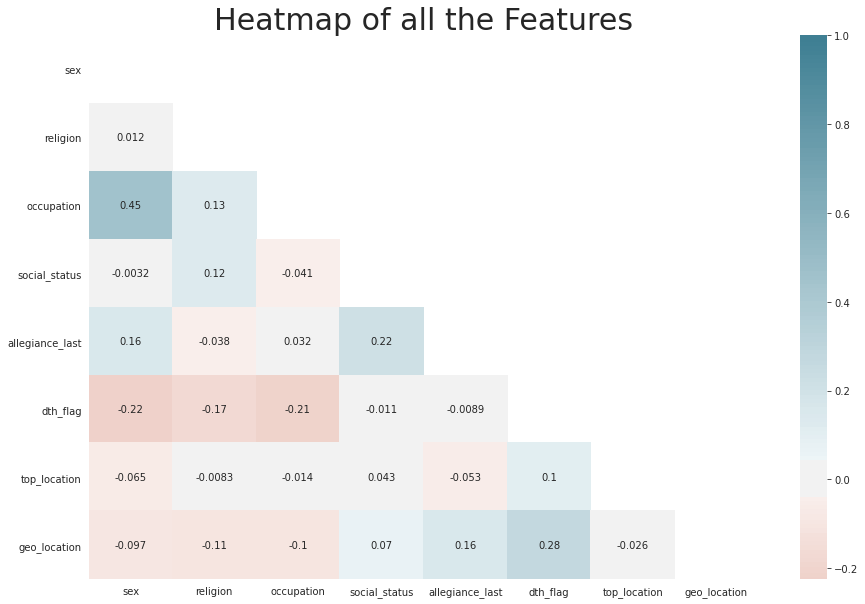

In [84]:
import seaborn as sn
import matplotlib.pyplot as plt
 
plt.style.use('ggplot')
sn.set_style('whitegrid')
plt.subplots(figsize = (15,10))
# affichage de la heatmap 

mask = np.zeros_like(survival.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sn.heatmap(survival.corr(), 
            cmap=sn.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           ); 
plt.title("Heatmap of all the Features", fontsize = 30);

Affichage différent:

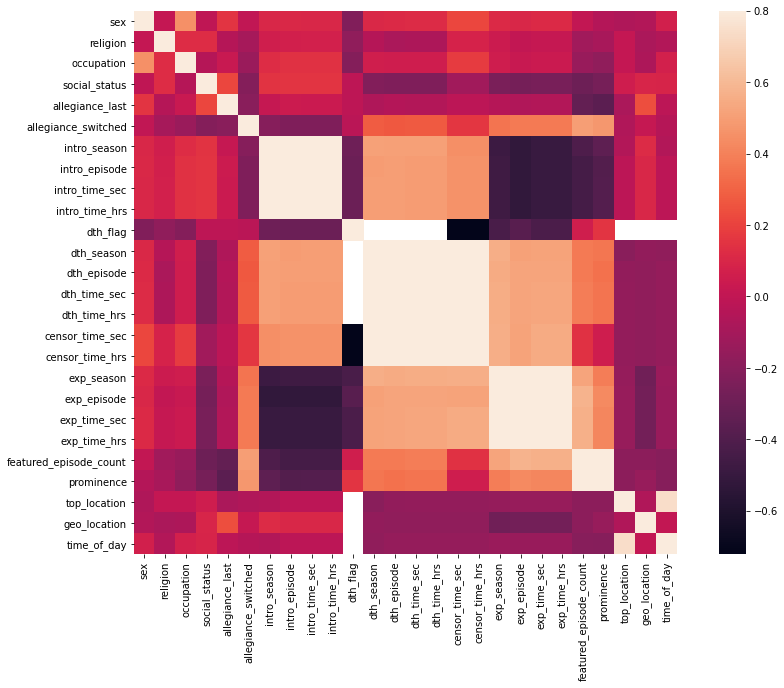

In [0]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix=survival.corr()
f, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(corr_matrix, vmax=.8, square=True);

In [0]:
corr_matrix['dth_flag']

sex                      -0.224214
religion                 -0.174126
occupation               -0.213440
social_status            -0.010524
allegiance_last          -0.008930
allegiance_switched      -0.023262
intro_season             -0.290209
intro_episode            -0.301592
intro_time_sec           -0.301875
intro_time_hrs           -0.301879
dth_flag                  1.000000
dth_season                     NaN
dth_episode                    NaN
dth_time_sec                   NaN
dth_time_hrs                   NaN
censor_time_sec          -0.721187
censor_time_hrs          -0.721172
exp_season               -0.426088
exp_episode              -0.374929
exp_time_sec             -0.420389
exp_time_hrs             -0.420394
featured_episode_count    0.060760
prominence                0.157182
top_location                   NaN
geo_location                   NaN
time_of_day                    NaN
Name: dth_flag, dtype: float64

In [0]:
columns_to_drop = ["name","time_of_day","dth_season","allegiance_switched","dth_episode","dth_time_sec","dth_time_hrs","censor_time_sec","censor_time_hrs","exp_season","exp_episode","exp_time_sec","exp_time_hrs","featured_episode_count","dth_description", "intro_season","prominence","intro_episode","intro_time_sec","intro_time_hrs","icd10_dx_code","icd10_dx_text","icd10_cause_code","icd10_cause_text","icd10_place_code","icd10_place_text"]
survival.drop(columns=columns_to_drop, axis=1, inplace=True)
survival["geo_location"].fillna(survival["geo_location"].median(),inplace=True)
survival["top_location"].fillna(survival["top_location"].median(),inplace=True)
survival

,sex,religion,occupation,social_status,allegiance_last,dth_flag,top_location,geo_location
0,1,9,2,2,3,1,2.0,1.0
1,1,9,2,2,3,1,2.0,1.0
2,1,9,2,2,3,1,2.0,1.0
3,2,1,2,2,2,1,1.0,2.0
4,1,4,2,1,3,0,2.0,1.0
...,...,...,...,...,...,...,...,...
354,1,9,1,1,1,0,2.0,1.0
355,1,9,1,1,1,0,2.0,1.0
356,1,9,1,1,1,0,2.0,1.0
357,1,9,1,1,1,0,2.0,1.0


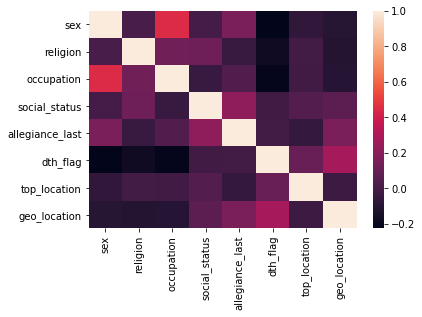

In [0]:
corr_matrix2=survival.corr()
sn.heatmap(corr_matrix2, annot=False)
plt.show()

## Decision Tree

In [0]:
predictors = ['sex', 'religion', 'occupation', 'social_status','allegiance_last', 'geo_location','top_location']
for col in predictors: # Loop through all columns in predictors
    if survival[col].dtype == 'object':  # check if column's type is object (text)
        survival[col] = pd.Categorical(survival[col]).codes  # convert text to numerical

survival

,sex,religion,occupation,social_status,allegiance_last,dth_flag,top_location,geo_location
0,1,9,2,2,3,1,2.0,1.0
1,1,9,2,2,3,1,2.0,1.0
2,1,9,2,2,3,1,2.0,1.0
3,2,1,2,2,2,1,1.0,2.0
4,1,4,2,1,3,0,2.0,1.0
...,...,...,...,...,...,...,...,...
354,1,9,1,1,1,0,2.0,1.0
355,1,9,1,1,1,0,2.0,1.0
356,1,9,1,1,1,0,2.0,1.0
357,1,9,1,1,1,0,2.0,1.0


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(survival[predictors], survival['dth_flag'], test_size=0.3, random_state=1)

clf_dt = DecisionTreeClassifier(random_state=1)

clf_dt.fit(X_train, y_train)
train_score = clf_dt.score(X_train, y_train)
test_score = clf_dt.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

scores = cross_val_score(clf_dt, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.8884462151394422
test accuracy = 0.7777777777777778
cross validation accuracy = 0.7629107981220657


In [0]:
feat_imp = pd.DataFrame(clf_dt.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
top_location,0.418879
allegiance_last,0.197895
religion,0.137188
geo_location,0.102574
occupation,0.056362
social_status,0.054172
sex,0.032931


## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1)  # by default, 10 trees are used
# your code here
clf_rf.fit(X_train, y_train)
train_score = clf_rf.score(X_train, y_train)
test_score = clf_rf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

# Cross validation
scores_rf = cross_val_score(clf_rf, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_rf.mean())

train accuracy = 0.8884462151394422
test accuracy = 0.7962962962962963
cross validation accuracy = 0.7350547730829422


In [0]:
feat_imp = pd.DataFrame(clf_rf.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
top_location,0.308667
allegiance_last,0.250014
religion,0.172264
geo_location,0.093275
occupation,0.079190
sex,0.055736
social_status,0.040854


# Data Cleaning

Cette étape consiste à nettoyer notre dataset pour rendre notre classification la plus efficace possible.

In [200]:
survival = pd.read_csv("Datasets/character_data_S01-S08.csv")
survival.head()

,id,name,sex,religion,occupation,social_status,allegiance_last,allegiance_switched,intro_season,intro_episode,intro_time_sec,intro_time_hrs,dth_flag,dth_season,dth_episode,dth_time_sec,dth_time_hrs,censor_time_sec,censor_time_hrs,exp_season,exp_episode,exp_time_sec,exp_time_hrs,featured_episode_count,prominence,dth_description,icd10_dx_code,icd10_dx_text,icd10_cause_code,icd10_cause_text,icd10_place_code,icd10_place_text,top_location,geo_location,time_of_day,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,100,Waymar Royce,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,342.0,0.10,342,0.10,1,1,342,0.10,1,1.0000,Killed by a white walker in a forest,T14,Injury of unspecified body region,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,101,Gared Tuttle,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,405.0,0.11,405,0.11,1,1,405,0.11,1,1.0000,Decapitation by a white walker in a forest,S18,Traumatic amputation at neck level,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,102,Will,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,692.0,0.19,692,0.19,1,1,692,0.19,1,1.0000,Decapitation by Ned Stark (legal execution) in...,S18,Traumatic amputation at neck level,Y35.5,Legal execution,Y92.86,Other specified countryside,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,103,Irri,2,1,2,2,2,2,1,1,135,0.04,1,2.0,16.0,48623.0,13.51,48623,13.51,2,16,48489,13.47,13,1.6250,Strangled to death with a tassel by Doreah in ...,T71,Asphyxiation,X91,"Assault by hanging, strangulation and suffocation",Y92.0,Home,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Jon Snow,1,4,2,1,3,2,1,1,454,0.13,0,NaN,NaN,NaN,NaN,230800,64.11,8,73,230347,63.99,63,6.9041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dans un premier temps, nous supprimons les variables non utilisables ou inappropriées. 

In [0]:
columns_to_drop = ["id","name","time_of_day","dth_season","allegiance_switched","dth_episode","dth_time_sec","dth_time_hrs","censor_time_sec","censor_time_hrs","exp_season","exp_episode","exp_time_sec","exp_time_hrs","featured_episode_count","dth_description", "intro_season","prominence","intro_episode","intro_time_sec","intro_time_hrs","icd10_dx_code","icd10_dx_text","icd10_cause_code","icd10_cause_text","icd10_place_code","icd10_place_text","Unnamed: 35","Unnamed: 36","Unnamed: 37","Unnamed: 38","Unnamed: 39","Unnamed: 40"]
survival.drop(columns=columns_to_drop, axis=1, inplace=True)

Ensuite, nous avons décidé de remplir certaines colonnes possédant des valeurs manquantes par la médiane de celle-ci.

In [202]:
survival["geo_location"].fillna(survival["geo_location"].median(),inplace=True)
survival["top_location"].fillna(survival["top_location"].median(),inplace=True)
survival

,sex,religion,occupation,social_status,allegiance_last,dth_flag,top_location,geo_location
0,1,9,2,2,3,1,2.0,1.0
1,1,9,2,2,3,1,2.0,1.0
2,1,9,2,2,3,1,2.0,1.0
3,2,1,2,2,2,1,1.0,2.0
4,1,4,2,1,3,0,2.0,1.0
...,...,...,...,...,...,...,...,...
354,1,9,1,1,1,0,2.0,1.0
355,1,9,1,1,1,0,2.0,1.0
356,1,9,1,1,1,0,2.0,1.0
357,1,9,1,1,1,0,2.0,1.0


Remarquons qu'à présent, il n'y a plus de valeurs manquantes dans notre dataset et qu'il est donc désormais prêt à être utilisé pour notre classifcation.

In [203]:
missing = pd.DataFrame(survival.isnull().sum() / len(survival) * 100, columns=['pct'])
missing.sort_values('pct', inplace = True)
missing

,pct
sex,0.0
religion,0.0
occupation,0.0
social_status,0.0
allegiance_last,0.0
dth_flag,0.0
top_location,0.0
geo_location,0.0


# Model Training

Dans cette partie, nous allons entraîner notre modèle pour obtenir une classifcation efficace. Le but est de prédire si un personnage, décrit par un certain nombre de donnée, est vivant ou pas à la fin de la série Game of Thrones.

Voici les predictors que nous allons utiliser pour réaliser notre classification.

In [0]:
predictors = ['sex', 'religion', 'occupation', 'social_status','allegiance_last', 'geo_location','top_location']

Dans un premier, nous séparons notre dataset en deux. Une partie sera utilisé pour l'entraînemant du modèle et l'autre partie pour vérifier que cet entraînement est efficace ou non.

In [205]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(survival[predictors], survival['dth_flag'], test_size=0.25, random_state=1)
print("Taille du dataset d'entraînement : ", len(X_train))
print("Taille du dataset de test : ", len(X_test))

Taille du dataset d'entraînement :  269
Taille du dataset de test :  90


Ensuite, nous allons utiliser un premier algorithme de classification : la régression linéaire.

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.6691449814126395
test accuracy = 0.6222222222222222
cross validation accuracy = 0.6350156494522692


In [49]:
from matplotlib import pyplot
importance = clf.coef_
print(importance)

[[-0.47445167 -0.11566068 -0.09303046 -0.1851657  -0.0496523   2.3020539
   0.15092948]]


## Decision Trees

Le premier outil de classification que nous avons utilisé est l'agorithme des Decision Trees.

In [207]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=1)

clf_dt.fit(X_train, y_train)
train_score = clf_dt.score(X_train, y_train)
test_score = clf_dt.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

scores = cross_val_score(clf_dt, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.8810408921933085
test accuracy = 0.8
cross validation accuracy = 0.7629107981220657


Affichons maintenant l'importance des données pour avoir du recul sur celles-ci et sur notre régression.


In [0]:
feat_imp = pd.DataFrame(clf_dt.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
top_location,0.410498
allegiance_last,0.172754
religion,0.152590
geo_location,0.101271
sex,0.057380
occupation,0.055883
social_status,0.049625


Maintenant, testons avec des paramètres différents.

In [0]:
clf_dt2 = DecisionTreeClassifier(random_state=1, min_samples_split=4, min_samples_leaf=1)

clf_dt2.fit(X_train, y_train)
train_score = clf_dt2.score(X_train, y_train)
test_score = clf_dt2.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

scores = cross_val_score(clf_dt2, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.8810408921933085
test accuracy = 0.7777777777777778
cross validation accuracy = 0.760133020344288


### Grid Search

Les résultats de la classification clf_dt2 ne sont pas très éloignés de la classification clf_dt3. Pour pouvoir trouver les meilleurs paramètres possibles nous allons utiliser le Grid Search.
Le Grid Search permet de tester le cross validation score de notre classification avec différentes combinaisons de paramètres.

In [208]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(1,10)),'min_samples_split':list(range(2,10)),
          'max_depth':list(range(1,10))}
clf_dt2=DecisionTreeClassifier(random_state=1)
clf_gs=GridSearchCV(clf_dt2, params, scoring = 'accuracy',cv=5)
clf_gs.fit(survival[predictors], survival["dth_flag"])

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5,

On peut ensuite afficher le meilleur score obtenu grâce au Grid Search et les paramètres correspondants.

In [209]:
clf_gs.best_score_

0.7993740219092331

In [210]:
clf_gs.best_params_

{'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 7}

On réutilise maintenant ces paramètres pour réaliser une classification.

In [211]:
clf_dt3 = DecisionTreeClassifier(random_state=1, **clf_gs.best_params_) 
clf_dt3.fit(X_train, y_train)
print ('train accuracy =', clf_dt3.score(X_train, y_train))
print ('test accuracy =', clf_dt3.score(X_test, y_test))

scores_dt3 = cross_val_score(clf_dt3, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =',scores_dt3.mean())

train accuracy = 0.8587360594795539
test accuracy = 0.8222222222222222
cross validation accuracy = 0.7993740219092331


Mean squared error

In [213]:
from sklearn.metrics import mean_squared_error
y_pred = clf_dt3.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error : ", mse)

Mean squared error :  0.17777777777777778


On remarque que la précision de cette classification est bonne.
On peut ensuite afficher l'importance des paramètres dans cette classification.

In [0]:
feat_imp = pd.DataFrame(clf_dt3.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
top_location,0.461652
allegiance_last,0.191933
geo_location,0.113890
religion,0.103556
sex,0.064530
occupation,0.043784
social_status,0.020654


On remarque que le paramètre top_location est prédominant.

### Plot the decision tree

Dans cette partie nous allons afficher l'arbre de décision qui a été utilisé par la classification précédente.

In [0]:
from sklearn import tree
tree.export_graphviz(clf_dt3, out_file='tree.dot')
print ("Predictors : ",dict(zip(range(len(predictors)),predictors)))

Predictors :  {0: 'sex', 1: 'religion', 2: 'occupation', 3: 'social_status', 4: 'allegiance_last', 5: 'geo_location', 6: 'top_location'}


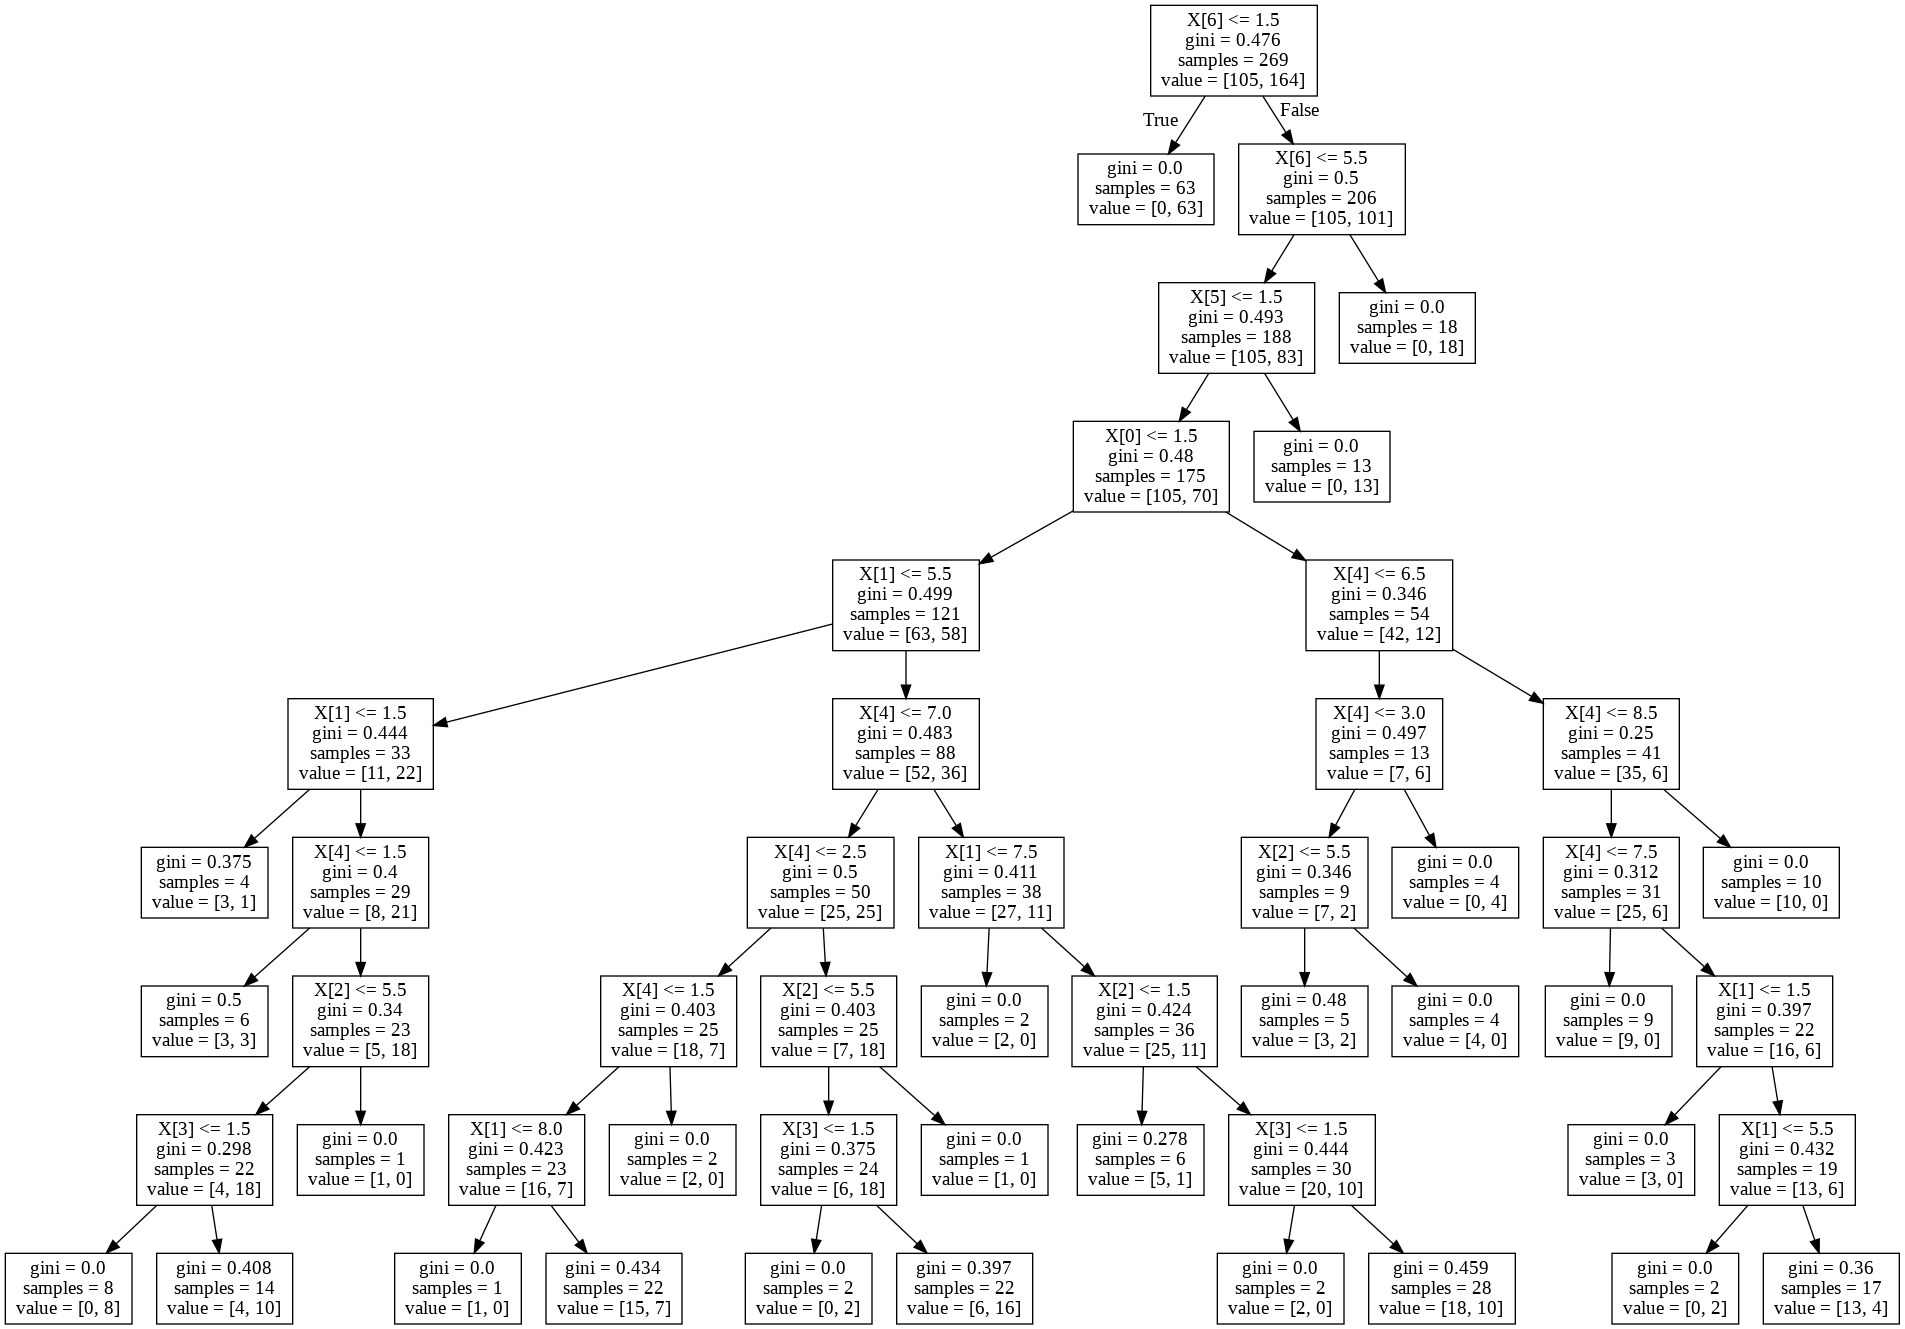

In [0]:
from IPython.display import Image
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('test.png')
Image('test.png')

## Random Forest

Le deuxième outil de classification que nous avons utilisé est l'agorithme de Random Forest.

In [214]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=1)

clf_rf.fit(X_train, y_train)
train_score = clf_rf.score(X_train, y_train)
test_score = clf_rf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

# Cross validation
scores_rf = cross_val_score(clf_rf, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores_rf.mean())

train accuracy = 0.8810408921933085
test accuracy = 0.7888888888888889
cross validation accuracy = 0.7350547730829422


Nous remarquons que la précision de la classification n'est très bonne et nous allons donc, par la suite, essayer de l'améliorer.

Affichons maintenant l'importance des données pour avoir du recul sur celles-ci et sur notre régression.

In [215]:
feat_imp = pd.DataFrame(clf_rf.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
top_location,0.293298
allegiance_last,0.244886
religion,0.168871
geo_location,0.099721
occupation,0.082408
sex,0.068458
social_status,0.042358


Si nous comparons à la classification utilisant les arbres de décision, il n'y pas de paramètres ayant une importante prédominance sur les autres.

L'algorithme de Random Forest utilise un certain nombre d'arbres et nous allons déterminer quel est le nombre permettant la meilleur classification. Dans un premier temps, nous affichons un graphique indiquant la précision de la prédiction pour un nombre d'arbre allant de 0 à 60.

Text(0.5, 0, 'Number of Trees')

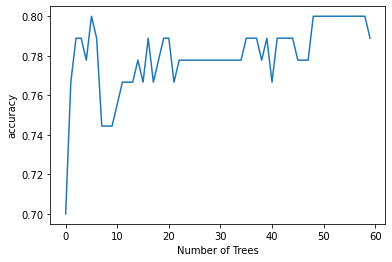

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

trees=range(60)
accuracy=np.zeros(60)
for idx in range(len(trees)):
    clf_rf=RandomForestClassifier(random_state=1, n_estimators=idx + 1)
    clf_rf.fit(X_train,y_train)
    accuracy[idx]=clf_rf.score(X_test, y_test)  

plt.plot(trees, accuracy)
plt.ylabel('accuracy')
plt.xlabel('Number of Trees')

### Grid Search

Grâce au diagramme précédent, nous remarquons que la précision est plus importante pour un nombre de d'arbre compris entre 45 et 50 (et entre 0 et 10). 
Nous allons donc fournir des paramètres adéquats à la fonction de GridSearch.

In [216]:
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':list(range(1,8)),'min_samples_split':list(range(2,8)),
          'n_estimators':list(range(4,8)) + list(range(45,50)),'max_depth':list(range(1,10))}
clf_rf2=RandomForestClassifier(random_state=1)
clf_gs2=GridSearchCV(clf_rf2, params, scoring = 'accuracy',cv=5)
clf_gs2.fit(survival[predictors], survival["dth_flag"])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

On peut ensuite afficher le meilleur score obtenu grâce au Grid Search et les paramètres correspondants.

In [0]:
clf_gs2.best_score_

0.788262910798122

In [0]:
clf_gs2.best_params_

{'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 47}

On réutilise maintenant ces paramètres pour réaliser une classification.

In [0]:
clf_rf3 = RandomForestClassifier(random_state=1, max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=47) 
clf_rf3.fit(X_train, y_train)
print ('train accuracy =', clf_rf3.score(X_train, y_train))
print ('test accuracy =', clf_rf3.score(X_test, y_test))

scores_rf3 = cross_val_score(clf_rf3, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =',scores_rf3.mean())

train accuracy = 0.8773234200743495
test accuracy = 0.7666666666666667
cross validation accuracy = 0.788262910798122


Affichons maintenant l'importance des données pour avoir du recul sur celles-ci et sur notre régression.

In [0]:
feat_imp = pd.DataFrame(clf_rf3.feature_importances_, predictors, columns=['Importance'])
feat_imp.sort_values('Importance', ascending=False)

,Importance
top_location,0.342686
allegiance_last,0.201733
religion,0.156325
geo_location,0.124090
occupation,0.069237
sex,0.066535
social_status,0.039393


On remarque que le paramètre top_location est moins prédominant pour cette classification que celle utilisant les Decision Trees. La précision, quant à elle, est assez semblable donc nous allons choisir cette classification et l'incorporer dans notre application.


## Perceptron

In [0]:
from sklearn.linear_model import Perceptron
clf_per = Perceptron(tol=1e-3, random_state=1)
clf_per.fit(X_train, y_train)
print ('train accuracy =', clf_per.score(X_train, y_train))
print ('test accuracy =', clf_per.score(X_test, y_test))

scores_per = cross_val_score(clf_per, survival[predictors], survival["dth_flag"], scoring='accuracy', cv=5)
print('cross validation accuracy =',scores_per.mean())

train accuracy = 0.40148698884758366
test accuracy = 0.4444444444444444
cross validation accuracy = 0.5428403755868545


## SVC

In [0]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train,y_train)
print("train score=",clf.score(X_train,y_train))
print("test score=",clf.score(X_test,y_test))

train score= 0.6689895470383276
test score= 0.6388888888888888


## Neural Network

### Data cleaning

In [0]:
survival = pd.read_csv("Datasets/character_data_S01-S08.csv")
columns_to_drop = ["id","name","intro_episode","intro_time_sec","intro_time_hrs","dth_season","dth_episode","dth_time_sec","dth_time_hrs","censor_time_sec","censor_time_hrs","exp_season","exp_episode","exp_time_sec","exp_time_hrs","featured_episode_count","prominence","dth_description","icd10_dx_code","icd10_dx_text","icd10_cause_code","icd10_cause_text","icd10_place_code","icd10_place_text","geo_location","time_of_day","top_location","Unnamed: 35","Unnamed: 36","Unnamed: 37","Unnamed: 38","Unnamed: 39","Unnamed: 40"]
survival.drop(columns=columns_to_drop, axis=1, inplace=True)
predictors = ["sex", "religion", "occupation", "social_status" ,"allegiance_last","allegiance_switched","intro_season"]  
survival = survival.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
survival

,sex,religion,occupation,social_status,allegiance_last,allegiance_switched,intro_season,dth_flag
0,0.0,1.000,0.125,1.0,0.250,0.0,0.0,1.0
1,0.0,1.000,0.125,1.0,0.250,0.0,0.0,1.0
2,0.0,1.000,0.125,1.0,0.250,0.0,0.0,1.0
3,1.0,0.000,0.125,1.0,0.125,1.0,0.0,1.0
4,0.0,0.375,0.125,0.0,0.250,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
354,0.0,1.000,0.000,0.0,0.000,0.0,1.0,0.0
355,0.0,1.000,0.000,0.0,0.000,0.0,1.0,0.0
356,0.0,1.000,0.000,0.0,0.000,0.0,1.0,0.0
357,0.0,1.000,0.000,0.0,0.000,0.0,1.0,0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(survival[predictors], survival['dth_flag'], test_size=0.25, random_state=1)

inputs_train = np.array(X_train[predictors].to_numpy())
outputs_train_bis = y_train.to_numpy()
outputs_train = [[None]] * len(X_train)

for index, value in enumerate(outputs_train_bis):
  outputs_train[index] = np.array([value])

In [0]:
inputs_test = np.array(X_test[predictors].to_numpy())
outputs_test = [[None]] * len(X_test)
outputs_test_bis = y_test.to_numpy()

for index, value in enumerate(outputs_test_bis):
  outputs_test[index] = np.array([value])

In [0]:
class NeuralNetwork:

    def __init__(self, inputs, outputs):
      self.inputs  = inputs
      self.outputs = outputs2
      self.weights = np.array([[.50], [.50], [.50], [.50], [.50], [.50], [.50]])
      self.error_history = []
      self.epoch_list = []
    
    def sigmoid(self, x, deriv=False):
      if deriv == True:
          return x * (1 - x)
      return 1 / (1 + np.exp(-x))

    def feed_forward(self):
      self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    def backpropagation(self):
      self.error  = self.outputs - self.hidden
      delta = self.error * self.sigmoid(self.hidden, deriv=True)
      self.weights += np.dot(self.inputs.T, delta)
    
    def train(self, epochs=25000):
      for epoch in range(epochs):
        self.feed_forward()
        self.backpropagation()

        self.error_history.append(np.average(np.abs(self.error)))
        self.epoch_list.append(epoch)

    def predict(self, new_input):
      prediction = self.sigmoid(np.dot(new_input, self.weights))
      return prediction

In [0]:
NN = NeuralNetwork(inputs, outputs2)
NN.train()

In [0]:
for input in inputs_test:
  print(NN.predict(input))

[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[0.9999998]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]


Text(0, 0.5, 'Loss')

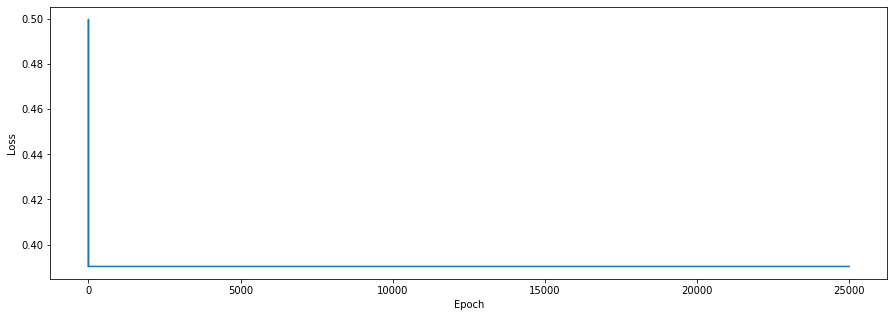

In [0]:
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Regression

In [188]:
survival_reg = pd.read_csv("Datasets/character_data_S01-S08.csv")
survival_reg.head()

,id,name,sex,religion,occupation,social_status,allegiance_last,allegiance_switched,intro_season,intro_episode,intro_time_sec,intro_time_hrs,dth_flag,dth_season,dth_episode,dth_time_sec,dth_time_hrs,censor_time_sec,censor_time_hrs,exp_season,exp_episode,exp_time_sec,exp_time_hrs,featured_episode_count,prominence,dth_description,icd10_dx_code,icd10_dx_text,icd10_cause_code,icd10_cause_text,icd10_place_code,icd10_place_text,top_location,geo_location,time_of_day,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,100,Waymar Royce,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,342.0,0.10,342,0.10,1,1,342,0.10,1,1.0000,Killed by a white walker in a forest,T14,Injury of unspecified body region,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,101,Gared Tuttle,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,405.0,0.11,405,0.11,1,1,405,0.11,1,1.0000,Decapitation by a white walker in a forest,S18,Traumatic amputation at neck level,X99.0,Assault by knife,Y92.84,Forest,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,102,Will,1,9,2,2,3,1,1,1,1,0.00,1,1.0,1.0,692.0,0.19,692,0.19,1,1,692,0.19,1,1.0000,Decapitation by Ned Stark (legal execution) in...,S18,Traumatic amputation at neck level,Y35.5,Legal execution,Y92.86,Other specified countryside,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,103,Irri,2,1,2,2,2,2,1,1,135,0.04,1,2.0,16.0,48623.0,13.51,48623,13.51,2,16,48489,13.47,13,1.6250,Strangled to death with a tassel by Doreah in ...,T71,Asphyxiation,X91,"Assault by hanging, strangulation and suffocation",Y92.0,Home,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Jon Snow,1,4,2,1,3,2,1,1,454,0.13,0,NaN,NaN,NaN,NaN,230800,64.11,8,73,230347,63.99,63,6.9041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columns_to_drop = ["id","name","time_of_day","allegiance_switched","dth_time_sec","dth_time_hrs","censor_time_sec","censor_time_hrs","exp_season","exp_episode","exp_time_sec","exp_time_hrs","featured_episode_count", "intro_season","prominence","intro_episode","intro_time_sec","intro_time_hrs","icd10_dx_code","icd10_dx_text","icd10_cause_code","icd10_cause_text","icd10_place_code","icd10_place_text","Unnamed: 35","Unnamed: 36","Unnamed: 37","Unnamed: 38","Unnamed: 39","Unnamed: 40"]
survival_reg.drop(columns=columns_to_drop, axis=1, inplace=True)

In [0]:
# Get names of indexes for which column dth_flag equals 0
indexNames = survival_reg[ survival_reg['dth_flag'] == 0 ].index
 
# Delete these row indexes from dataFrame
survival_reg.drop(indexNames , inplace=True)
survival_reg.drop(columns=['dth_flag'], axis=1, inplace=True)

In [191]:
survival_reg["geo_location"].fillna(survival_reg["geo_location"].median(),inplace=True)
survival_reg["top_location"].fillna(survival_reg["top_location"].median(),inplace=True)
survival_reg

,sex,religion,occupation,social_status,allegiance_last,dth_season,dth_episode,dth_description,top_location,geo_location
0,1,9,2,2,3,1.0,1.0,Killed by a white walker in a forest,2.0,1.0
1,1,9,2,2,3,1.0,1.0,Decapitation by a white walker in a forest,2.0,1.0
2,1,9,2,2,3,1.0,1.0,Decapitation by Ned Stark (legal execution) in...,2.0,1.0
3,2,1,2,2,2,2.0,16.0,Strangled to death with a tassel by Doreah in ...,1.0,2.0
6,1,3,1,1,1,3.0,29.0,Shot by arrows and stabbed in the abdomen in t...,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
345,1,9,2,2,4,8.0,72.0,Burned alive by Drogon during the Battle of Ki...,2.0,1.0
346,1,9,2,2,4,8.0,72.0,Spear in chest by Grey Worm during the Battle ...,2.0,1.0
347,1,9,2,2,4,8.0,72.0,Stabbed by Stark soldiers during the Battle of...,2.0,1.0
348,2,9,9,2,4,8.0,72.0,Throat slit by Stark soldier during the Battle...,2.0,1.0


## Première version

In [0]:
predictors1 = ['sex', 'religion', 'occupation', 'social_status','allegiance_last', 'geo_location','top_location']

In [184]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(survival_reg[predictors1], survival_reg['dth_episode'], test_size=0.30, random_state=1)

clf = LogisticRegression()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, survival_reg[predictors1], survival_reg["dth_episode"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.30405405405405406
test accuracy = 0.1875
cross validation accuracy = 0.17486157253599113


In [0]:
predictors2 = ['sex', 'religion', 'occupation', 'social_status','allegiance_last', 'geo_location','top_location','dth_episode']

In [185]:
clf2 = LogisticRegression(random_state=1)
clf2.fit(X_train, y_train)
train_score = clf2.score(X_train, y_train)
test_score = clf2.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf2, survival_reg[predictors2], survival_reg["dth_description"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.30405405405405406
test accuracy = 0.1875
cross validation accuracy = 0.1273532668881506


### Application

In [149]:
clf.predict([[1,2,1,1,3,2,2]])

array(['65.0_Burnt to death by dragon fire after the Battle of the Gold Road'],
      dtype=object)

In [0]:
# Get names of indexes for which column Age has value 30
indexNames = survival_reg[ survival_reg['dth_episode'] != 42 ].index
 
# Delete these row indexes from dataFrame
survival_reg.drop(indexNames , inplace=True)

In [121]:
clf2.predict([[70,1,2,1,1,3,2,2]])

array(['Strangled to death with a tassel by Doreah in a room in a castle in Qarth'],
      dtype=object)

## Deuxième version

In [192]:
survival_reg["dth_episode"] = survival_reg["dth_episode"].astype(str) + "_" + survival_reg["dth_description"]
survival_reg.drop(columns=['dth_description'], axis=1, inplace=True)
survival_reg.rename(columns={"dth_episode": "dth_ep_descritpion"})
survival_reg

,sex,religion,occupation,social_status,allegiance_last,dth_season,dth_episode,top_location,geo_location
0,1,9,2,2,3,1.0,1.0_Killed by a white walker in a forest,2.0,1.0
1,1,9,2,2,3,1.0,1.0_Decapitation by a white walker in a forest,2.0,1.0
2,1,9,2,2,3,1.0,1.0_Decapitation by Ned Stark (legal execution...,2.0,1.0
3,2,1,2,2,2,2.0,16.0_Strangled to death with a tassel by Dorea...,1.0,2.0
6,1,3,1,1,1,3.0,29.0_Shot by arrows and stabbed in the abdomen...,1.0,1.0
...,...,...,...,...,...,...,...,...,...
345,1,9,2,2,4,8.0,72.0_Burned alive by Drogon during the Battle ...,2.0,1.0
346,1,9,2,2,4,8.0,72.0_Spear in chest by Grey Worm during the Ba...,2.0,1.0
347,1,9,2,2,4,8.0,72.0_Stabbed by Stark soldiers during the Batt...,2.0,1.0
348,2,9,9,2,4,8.0,72.0_Throat slit by Stark soldier during the B...,2.0,1.0


In [199]:
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(survival_reg[predictors1], survival_reg['dth_episode'], test_size=0.25, random_state=1)

from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, survival_reg[predictors1], survival_reg["dth_episode"], scoring='accuracy', cv=5)
print('cross validation accuracy =', scores.mean())

train accuracy = 0.0
test accuracy = 0.0
cross validation accuracy = 0.10376522702104099


## Récupération des données d'épisodes

In [23]:
episodes = pd.read_csv("Datasets/episode_data.csv")
episodes.head(20)

,season,episode_number,episode_name,gross_running_time,opening_credits_time,closing_credits_time,net_running_time,cumulative_net_running_time
0,1,1,"""Winter Is Coming""",3546,110,33,3403,3403
1,1,2,"""The Kingsroad""",3182,111,34,3037,6440
2,1,3,"""Lord Snow""",3294,96,27,3171,9611
3,1,4,"""Cripples, Bastards, and Broken Things""",3201,96,26,3079,12690
4,1,5,"""The Wolf and the Lion""",3123,101,24,2998,15688
5,1,6,"""A Golden Crown""",3027,103,26,2898,18586
6,1,7,"""You Win or You Die""",3325,105,26,3194,21780
7,1,8,"""The Pointy End""",3345,105,28,3212,24992
8,1,9,"""Baelor""",3238,116,32,3090,28082
9,1,10,"""Fire and Blood""",3028,116,32,2880,30962


In [0]:
def get_season(episode_number):
  episode = episodes[episodes['episode_number'] == episode_number]
  return episode.at[episode_number - 1, "season"]

In [0]:
def get_name(episode_number):
  episode = episodes[episodes['episode_number'] == episode_number]
  return episode.at[episode_number - 1, 'episode_name']